# Exploratory Data Analysis (EDA) of Zillow Data
In this notebook initial EDA is conducted on the Zillow data set.

## Import required packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Import processed data
- Columns are in lower case
- Zip code column renamed to zip
- Index set to date column in datetime format

In [2]:
zill = pd.read_csv('../../zillow_cleaned_no_nulls.csv', index_col=0, dtype = {'zip':'object'})

In [3]:
zill.dtypes

regionid        int64
zip            object
city           object
state          object
metro          object
countyname     object
sizerank        int64
value         float64
dtype: object

In [4]:
zill.index = pd.to_datetime(zill.index)

In [5]:
zill.zip = zill.zip.apply(lambda z: str(z))

In [6]:
zill.columns

Index(['regionid', 'zip', 'city', 'state', 'metro', 'countyname', 'sizerank',
       'value'],
      dtype='object')

In [7]:
zill.head()

,regionid,zip,city,state,metro,countyname,sizerank,value
date,,,,,,,,
1996-04-01,58196,01001,Agawam,MA,Springfield,Hampden,5851,113100.0
1996-05-01,58196,01001,Agawam,MA,Springfield,Hampden,5851,112800.0
1996-06-01,58196,01001,Agawam,MA,Springfield,Hampden,5851,112600.0
1996-07-01,58196,01001,Agawam,MA,Springfield,Hampden,5851,112300.0
1996-08-01,58196,01001,Agawam,MA,Springfield,Hampden,5851,112100.0


## Below, each feature is analyzed for the data set in turn
Prior to creating any models, each feature is assessed to discover if there are any underlying issues affecting feature selection in this data set.

In [8]:
zill.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3901595 entries, 1996-04-01 to 2018-04-01
Data columns (total 8 columns):
 #   Column      Dtype  
---  ------      -----  
 0   regionid    int64  
 1   zip         object 
 2   city        object 
 3   state       object 
 4   metro       object 
 5   countyname  object 
 6   sizerank    int64  
 7   value       float64
dtypes: float64(1), int64(2), object(5)
memory usage: 267.9+ MB


After initial research, Zillow defines 'sizerank' as the average house price per state divided by the population of that state.

## Datetime Index

In [9]:
len(zill.index.value_counts())

265

__Key Takeaway__ The original data set included 265 columns for months and years with the associated price of a house.  As such, the value counts for features in the EDA for this data set must be divided by 265 to assure accurate actual counts.

### RegionID

In [10]:
zill.regionid.value_counts()/265

63457    1.0
92897    1.0
60113    1.0
99067    1.0
74479    1.0
        ... 
89457    1.0
99690    1.0
77180    1.0
60740    1.0
69666    1.0
Name: regionid, Length: 14723, dtype: float64

In [11]:
(zill.regionid.value_counts().min()/265), (zill.regionid.value_counts().max()/265)

(1.0, 1.0)

__Key Takeaway__ This value is unique to all values and therefore adds no value.  It will be removed after the comparison of regions against one another.  As such, this column is added the the 'kill_cols' list for ulitmate deletion.

In [12]:
zill.metro.value_counts()

New York                          206435
Los Angeles-Long Beach-Anaheim     91955
Chicago                            86125
Philadelphia                       74730
Washington                         65985
                                   ...  
Terrebonne                           265
Au Sable                             265
Kellogg                              265
Ketchikan                            265
Quilcene                             265
Name: metro, Length: 1546, dtype: int64

In [13]:
kill_cols = ['regionid']

## Zip

In [14]:
(zill.zip.value_counts().min()/265), (zill.zip.value_counts().max()/265)

(1.0, 1.0)

In [15]:
zill.zip.value_counts()

66204    265
49415    265
10588    265
92260    265
22853    265
        ... 
75181    265
80907    265
30248    265
56361    265
75454    265
Name: zip, Length: 14723, dtype: int64

__Key Takeaway__  This is the value for which we are picking the "best" performers.  As such it will be kept for EDA purposes.

## City

In [16]:
(zill.city.value_counts().min()/265), (zill.city.value_counts().max()/265)

(1.0, 114.0)

In [17]:
zill.city.value_counts()

New York       30210
Los Angeles    25175
Houston        23320
San Antonio    12720
Washington     11925
               ...  
Poynor           265
Southbridge      265
Pearl            265
Floral City      265
Quilcene         265
Name: city, Length: 7554, dtype: int64

## State

In [18]:
(zill.state.value_counts().min()/265), (zill.state.value_counts().max()/265)

(16.0, 1224.0)

In [19]:
zill.state.value_counts()/265

CA    1224.0
NY    1015.0
TX     989.0
PA     831.0
FL     785.0
OH     588.0
IL     547.0
NJ     502.0
MI     499.0
IN     428.0
NC     428.0
MA     417.0
TN     404.0
VA     401.0
MN     375.0
GA     345.0
WA     341.0
WI     332.0
MO     319.0
MD     317.0
CO     249.0
KS     241.0
AZ     230.0
OR     224.0
OK     221.0
SC     206.0
NH     199.0
LA     193.0
AL     183.0
IA     158.0
MS     153.0
KY     139.0
CT     124.0
UT     121.0
ID     110.0
AR     105.0
NV     103.0
ME      86.0
NE      83.0
WV      72.0
MT      71.0
HI      62.0
NM      60.0
RI      59.0
DE      41.0
ND      31.0
WY      31.0
AK      28.0
SD      19.0
DC      18.0
VT      16.0
Name: state, dtype: float64

## Metro

In [20]:
(zill.metro.value_counts().min()/265), (zill.metro.value_counts().max()/265)

(1.0, 779.0)

In [21]:
zill.metro.value_counts()/265

New York                          779.0
Los Angeles-Long Beach-Anaheim    347.0
Chicago                           325.0
Philadelphia                      282.0
Washington                        249.0
                                  ...  
Terrebonne                          1.0
Au Sable                            1.0
Kellogg                             1.0
Ketchikan                           1.0
Quilcene                            1.0
Name: metro, Length: 1546, dtype: float64

## CountyName

In [22]:
(zill.countyname.value_counts().min()/265), (zill.countyname.value_counts().max()/265)

(1.0, 264.0)

In [23]:
zill.countyname.value_counts()/265

Los Angeles      264.0
Jefferson        175.0
Orange           166.0
Washington       164.0
Montgomery       159.0
                 ...  
Cannon             1.0
Staunton City      1.0
Nolan              1.0
Lumpkin            1.0
West Carroll       1.0
Name: countyname, Length: 1212, dtype: float64

## SizeRank

In [24]:
zill.sizerank.min(), zill.sizerank.max()

(1, 14723)

In [25]:
zill.sizerank

date
1996-04-01    5851
1996-05-01    5851
1996-06-01    5851
1996-07-01    5851
1996-08-01    5851
              ... 
2017-12-01    7294
2018-01-01    7294
2018-02-01    7294
2018-03-01    7294
2018-04-01    7294
Name: sizerank, Length: 3901595, dtype: int64

## Value

In [26]:
zill.value.min(), zill.value.max()

(11300.0, 19314900.0)

In [27]:
type(zill.index)

pandas.core.indexes.datetimes.DatetimeIndex

### Let's first explore all house values by year in the data set

In [28]:
zill.columns

Index(['regionid', 'zip', 'city', 'state', 'metro', 'countyname', 'sizerank',
       'value'],
      dtype='object')

In [29]:
yearly = zill.groupby([zill.index.year, zill.zip]).agg({'regionid': 'min', 'sizerank': 'min', 'value': 'mean'})

In [30]:
yearly.head()

regionid  sizerank          value
date zip                                     
1996 01001     58196      5851  112222.222222
     01002     58197      4200  158444.444444
     01005     58200     11214  103944.444444
     01007     58201      6851  131288.888889
     01008     58202     14548  116877.777778

In [31]:
yearly.index.get_level_values(0)

Int64Index([1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996, 1996,
            ...
            2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018, 2018],
           dtype='int64', name='date', length=338629)

In [32]:
sns.set(rc={'figure.figsize':(12,7)})

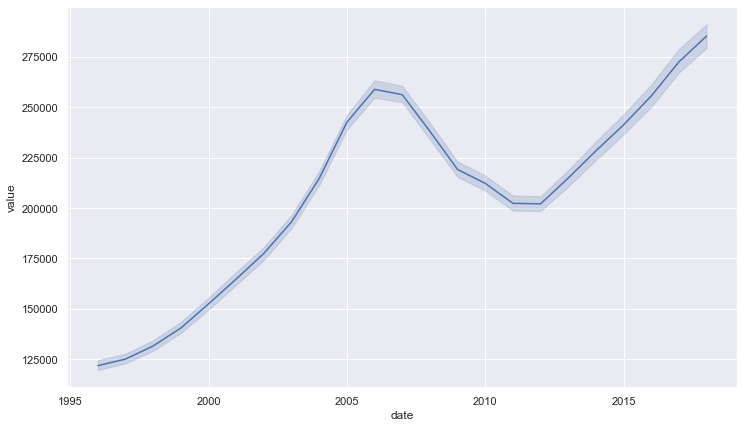

In [33]:
yearly_lineplot = sns.lineplot(x = yearly.index.get_level_values(0), 
                               y = 'value',
                               data = yearly);

__Key takeaway__: It appears that there was a dip in the mean of all housing prices starting in 2006 hitting the bottom in 2011 and rebounding through 2018.  Perhaps it's best to investigate housing value from 2011 through 2018.  With that said, it would be interesting to see which zip codes exhibited resilience to the housing crisis from 2006 to 2011 as a potential future indicator of retained value through a national crisis.

In [34]:
fig = yearly_lineplot.get_figure()    
fig.savefig('../viz/all_values_annual.png')

In [35]:
states = zill.groupby([zill.index.year, zill.state]).agg({'regionid':'min', 'sizerank':'min', 'value':'mean'})

### What zip codes inceased in value the most from 2011 to 2018?
After housing prices rebounded from the 2006 dip, which 10 zip codes increase the most in value?

### Determining the highest growing zipcodes from 2011 - 2018

In [36]:
values_2018 = yearly.loc[yearly.index.get_level_values(0) == 2018].value
values_2011 = yearly.loc[yearly.index.get_level_values(0) == 2011].value
zip_growth = pd.DataFrame(np.log(values_2018.values) - np.log(values_2011.values), columns = ['growth'])
zip_growth['zipcodes'] = values_2018.index.get_level_values(1)
zip_growth1118 = zip_growth.sort_values(by='growth', ascending=False)

#### Top 10 zipcodes by growth

In [37]:
list(zip_growth1118.head(10)['zipcodes'].values)

['85035',
 '30032',
 '33404',
 '11216',
 '85008',
 '94804',
 '34207',
 '33936',
 '94089',
 '80216']

### Determining the highest growing states from 2011 - 2018

In [38]:
states = zill.groupby([zill.index.year, zill.state]).agg({'regionid': 'min', 'sizerank': 'min', 'value': 'mean'})

In [39]:
states_values_2018 = states.loc[states.index.get_level_values(0) == 2018].value
states_values_2011 = states.loc[states.index.get_level_values(0) == 2011].value
states_growth = pd.DataFrame(np.log(states_values_2018.values) - np.log(states_values_2011.values), columns = ['growth'])
states_growth['states'] = states_values_2018.index.get_level_values(1)
states_growth = states_growth.sort_values(by='growth', ascending=False)

#### Top 10 states by growth

In [40]:
top_10 = states_growth.head(10)
list(top_10['states'].values)

['NV', 'CA', 'WA', 'FL', 'CO', 'AZ', 'OR', 'MI', 'DC', 'UT']

In [41]:
top_10_list = list(top_10['states'][0:10])

In [42]:
top_10_states = states.loc[states.index.get_level_values(1).isin(top_10_list)]

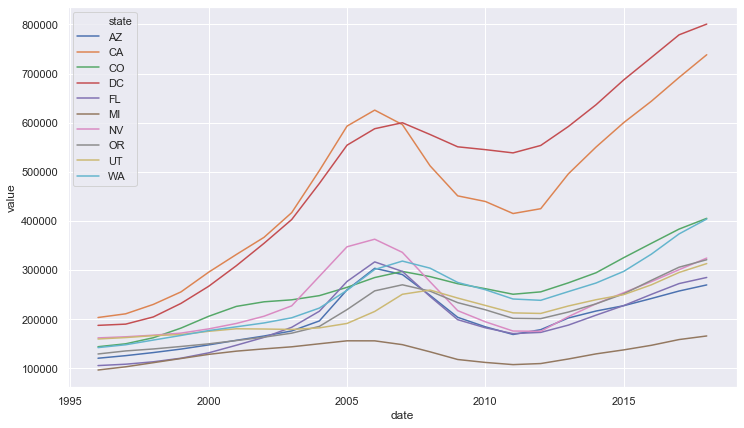

In [43]:
sns.lineplot(x=top_10_states.index.get_level_values(0),
            y=top_10_states['value'],
            hue=top_10_states.index.get_level_values(1))

### Top 10 most profitable zip codes from 2011 to 2018
- 33404
- 11216
- 85008
- 94804
- 34207
- 33936
- 94089
- 94606
- 33056
- 94601

### Top 10 most profitable states from 2011 to 2018
- NV 
- CA 
- WA 
- FL 
- CO 
- AZ 
- OR 
- MI 
- ID
- DC

### Using standard deviation to measure volatility:

In [44]:
vol_zips = yearly.groupby(yearly.index.get_level_values(1)).std()
vol_states = states.groupby(states.index.get_level_values(1)).std()
vol_zips = vol_zips.drop(['regionid','sizerank'],axis=1)
vol_states = vol_states.drop(['regionid','sizerank'],axis=1)

In [45]:
vol_zips.sort_values(by='value', ascending=True)
vol_zips_top_10 = vol_zips.sort_values(by='value', ascending=True)[0:10]

In [46]:
vol_states.sort_values(by='value', ascending=True)
vol_states_top_10 = vol_states.sort_values(by='value', ascending=True)[0:10]

### Resiliant Zips
To assess resiliance to risk, we can use standard deviation again to determine which zipcodes were the least affected by the housing crisis from 2006 to 2011

In [47]:
crisis_list = ['2006','2007','2008','2009','2010','2011']
crisis_years = yearly.loc[yearly.index.get_level_values(0).isin(crisis_list)]

In [48]:
vol_zips_crisis = crisis_years.groupby(crisis_years.index.get_level_values(1)).std()

In [49]:
vol_zips_crisis = vol_zips_crisis.drop(['regionid','sizerank'],axis=1)
vol_zips_crisis_top_10 = vol_zips_crisis.sort_values(by='value', ascending=True)[0:10]

## Maximum real estate value increase across the entire data set
What zip codes increased in value the most from 1996 to 2018?

In [50]:
values_2018 = yearly.loc[yearly.index.get_level_values(0) == 2018].value
values_1996 = yearly.loc[yearly.index.get_level_values(0) == 1996].value
zip_growth = pd.DataFrame(np.log(values_2018.values) - np.log(values_1996.values), columns = ['growth'])
zip_growth['zipcodes'] = values_2018.index.get_level_values(1)
zip_growth9618 = zip_growth.sort_values(by='growth', ascending=False)

In [51]:
zip_growth_top_10 = zip_growth9618[0:10]
zip_growth_top_10

,growth,zipcodes
1565,2.466887,11211
1575,2.442494,11222
1569,2.354554,11216
993,2.336083,07302
1568,2.264197,11215
1750,2.259388,11930
1774,2.244073,11975
12932,2.169873,90291
3290,2.118721,20001
12050,2.106431,80449


## Seasonality in real estate prices
Are there any sesonality trend in the real estate prices?  Let's take a look.

In [52]:
monthly = zill.groupby([zill.index.month, zill.zip]).agg({'regionid': 'min', 'sizerank': 'min', 'value': 'mean'})

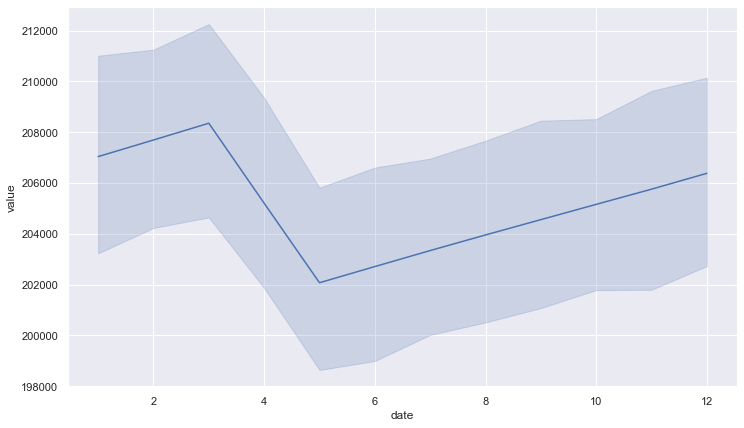

In [53]:
## Monthly sales prices for all housing prices
monthly_lineplot_all = sns.lineplot(x = monthly.index.get_level_values(0),
                                y = 'value',
                                data = monthly);

In [54]:
top_zips_list = list(zip_growth[0:10]['zipcodes'].values)

In [55]:
monthly = zill.groupby([zill.index.month, zill.zip]).mean()
monthly_top_zips = monthly.loc[monthly.index.get_level_values(1).isin(top_zips_list)]

In [56]:
len(monthly_top_zips.index.get_level_values(0)),\
len(monthly_top_zips['value'])

(120, 120)

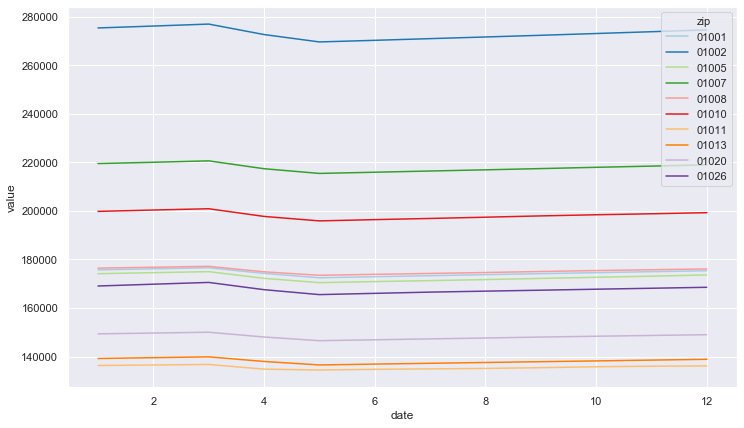

In [57]:
## Monthly sales prices by zip
colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#ff7f00','#cab2d6','#6a3d9a']
monthly_lineplot = sns.lineplot(x = monthly_top_zips.index.get_level_values(0),
                                y = monthly_top_zips['value'],
                                hue = monthly_top_zips.index.get_level_values(1),
                                palette = sns.color_palette(colors))

__Key Takeaway__: In the aggregate, there appears to be an increase in housing prices in March followed by a dip through May.  Prices then increase from May back to March before the cycle repeats.  When looking at the house values by zip code, there appears to be a much less drastic relationship.  Additional analysis regarding seasonality will take place after selecting the top 10 target zip codes.

In [58]:
list_of_rankings = [vol_zips_crisis,zip_growth1118,zip_growth9618,vol_zips]

In [59]:
import pickle
with open('../Step02_Zip_Code_Selection/rankings.pickle', "wb") as f:
    pickle.dump(vol_zips_crisis, f)
    pickle.dump(zip_growth1118, f)
    pickle.dump(zip_growth9618, f)
    pickle.dump(vol_zips, f)